# Checkpoint Five: Modeling Data

With your visualizations ready to go, the final step in your project is to do some predictive analysis on your dataset. You will be using linear regression for your model. You will not be penalized if your linear regression model does not work out. You just need to build the model and make notes as to the results.

Link to my dataset:

## Prepare Your Dataframe

Import any libraries you need and create a dataframe.

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sb
import datetime as dt
from scipy.stats import linregress

anime_df = pd.read_csv("anime_cleaned.csv")
manga_df = pd.read_csv("manga_cleaned_bh.csv")
anime_df.head()


,Unnamed: 0,anime_id,title,type,score,scored_by,status,episodes,start_date,end_date,...,start_season,genres,themes,demographics,studios,producers,licensors,synopsis,background,url
0,0,5114,Fullmetal Alchemist: Brotherhood,tv,9.13,1871705,finished_airing,64.0,4/5/2009,7/4/2010,...,spring,"['Action', 'Adventure', 'Drama', 'Fantasy']",['Military'],['Shounen'],['Bones'],"['Aniplex', 'Square Enix', 'Mainichi Broadcast...","['Funimation', 'Aniplex of America']",After a horrific alchemy experiment goes wrong...,Not Available,https://myanimelist.net/anime/5114/Fullmetal_A...
1,1,11061,Hunter x Hunter (2011),tv,9.04,1509622,finished_airing,148.0,10/2/2011,9/24/2014,...,fall,"['Action', 'Adventure', 'Fantasy']",[],['Shounen'],['Madhouse'],"['VAP', 'Nippon Television Network', 'Shueisha']",['VIZ Media'],Hunters devote themselves to accomplishing haz...,Not Available,https://myanimelist.net/anime/11061/Hunter_x_H...
2,2,38524,Shingeki no Kyojin Season 3 Part 2,tv,9.07,1329500,finished_airing,10.0,4/29/2019,7/1/2019,...,spring,"['Action', 'Drama']","['Gore', 'Military', 'Survival']",['Shounen'],['Wit Studio'],"['Production I.G', 'Dentsu', 'Mainichi Broadca...",['Funimation'],Seeking to restore humanity's diminishing hope...,Shingeki no Kyojin adapts content from volumes...,https://myanimelist.net/anime/38524/Shingeki_n...
3,3,9253,Steins;Gate,tv,9.08,1252286,finished_airing,24.0,4/6/2011,9/14/2011,...,spring,"['Drama', 'Sci-Fi', 'Suspense']","['Psychological', 'Time Travel']",[],['White Fox'],"['Frontier Works', 'Media Factory', 'Movic', '...",['Funimation'],Eccentric scientist Rintarou Okabe has a never...,Steins;Gate is based on 5pb. and Nitroplus' re...,https://myanimelist.net/anime/9253/Steins_Gate
4,4,28851,Koe no Katachi,movie,8.95,1398608,finished_airing,1.0,9/17/2016,9/17/2016,...,summer,['Drama'],['Romantic Subtext'],['Shounen'],['Kyoto Animation'],"['Shochiku', 'Pony Canyon', 'Kodansha', 'ABC A...","['Eleven Arts', 'NYAV Post']","As a wild youth, elementary school student Sho...",Winner of the Excellence Award on the 20th Jap...,https://myanimelist.net/anime/28851/Koe_no_Kat...


In [28]:
manga_df.head()

,Unnamed: 0,manga_id,title,type,score,scored_by,status,volumes,chapters,start_date,...,favorites,sfw,approved,genres,themes,demographics,authors,serializations,synopsis,url
0,0,2,Berserk,manga,9.45,268737,currently_publishing,Unknown,Unknown,8/25/1989,...,103820,True,True,"['Action', 'Adventure', 'Award Winning', 'Dram...","['Gore', 'Military', 'Mythology', 'Psychologic...",['Seinen'],"[{'id': 1868, 'first_name': 'Kentarou', 'last_...",['Young Animal'],"Guts, a former mercenary now known as the ""Bla...",https://myanimelist.net/manga/2/Berserk
1,1,13,One Piece,manga,9.20,305917,currently_publishing,Unknown,Unknown,7/22/1997,...,99526,True,True,"['Action', 'Adventure', 'Fantasy']",[],['Shounen'],"[{'id': 1881, 'first_name': 'Eiichiro', 'last_...",['Shounen Jump (Weekly)'],"Gol D. Roger, a man referred to as the ""Pirate...",https://myanimelist.net/manga/13/One_Piece
2,2,25,Fullmetal Alchemist,manga,9.05,143879,finished,27,116,7/12/2001,...,28519,True,True,"['Action', 'Adventure', 'Award Winning', 'Dram...",['Military'],['Shounen'],"[{'id': 1874, 'first_name': 'Hiromu', 'last_na...",['Shounen Gangan'],Alchemists are knowledgeable and naturally tal...,https://myanimelist.net/manga/25/Fullmetal_Alc...
3,3,1706,JoJo no Kimyou na Bouken Part 7: Steel Ball Run,manga,9.27,125482,finished,24,96,1/19/2004,...,35456,True,True,"['Action', 'Adventure', 'Horror', 'Mystery', '...",['Historical'],"['Seinen', 'Shounen']","[{'id': 2619, 'first_name': 'Hirohiko', 'last_...",['Ultra Jump'],"In the American Old West, the world's greatest...",https://myanimelist.net/manga/1706/JoJo_no_Kim...
4,4,4632,Oyasumi Punpun,manga,9.03,141146,finished,13,147,3/15/2007,...,43168,True,True,"['Drama', 'Slice of Life']",['Psychological'],['Seinen'],"[{'id': 2836, 'first_name': 'Inio', 'last_name...",['Big Comic Spirits'],Punpun Onodera is a normal 11-year-old boy liv...,https://myanimelist.net/manga/4632/Oyasumi_Punpun


<h1 style="background-color:Blue; color:White; text-align:center">Anime Data Modeling</h1>

In [29]:
anime_df.info()
# I was initially getting an error for the pair chart below. The following code was use to try to figure out what that error was.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19311 entries, 0 to 19310
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        19311 non-null  int64  
 1   anime_id          19311 non-null  int64  
 2   title             19311 non-null  object 
 3   type              19257 non-null  object 
 4   score             19311 non-null  float64
 5   scored_by         19311 non-null  int64  
 6   status            19311 non-null  object 
 7   episodes          18805 non-null  float64
 8   start_date        18919 non-null  object 
 9   end_date          18011 non-null  object 
 10  source            19311 non-null  object 
 11  members           19311 non-null  int64  
 12  favorites         19311 non-null  int64  
 13  episode_duration  18725 non-null  object 
 14  total_duration    19311 non-null  object 
 15  rating            18766 non-null  object 
 16  sfw               19311 non-null  bool  

In [11]:
anime_df['sfw'] = pd.to_numeric(anime_df['sfw'])
anime_df['sfw'].describe

<bound method NDFrame.describe of 0        True
1        True
2        True
3        True
4        True
         ... 
19306    True
19307    True
19308    True
19309    True
19310    True
Name: sfw, Length: 19311, dtype: bool>

## Find Correlations

Use either pairplot or a heatmap or both to find the two variables with the strongest correlation in your dataset.

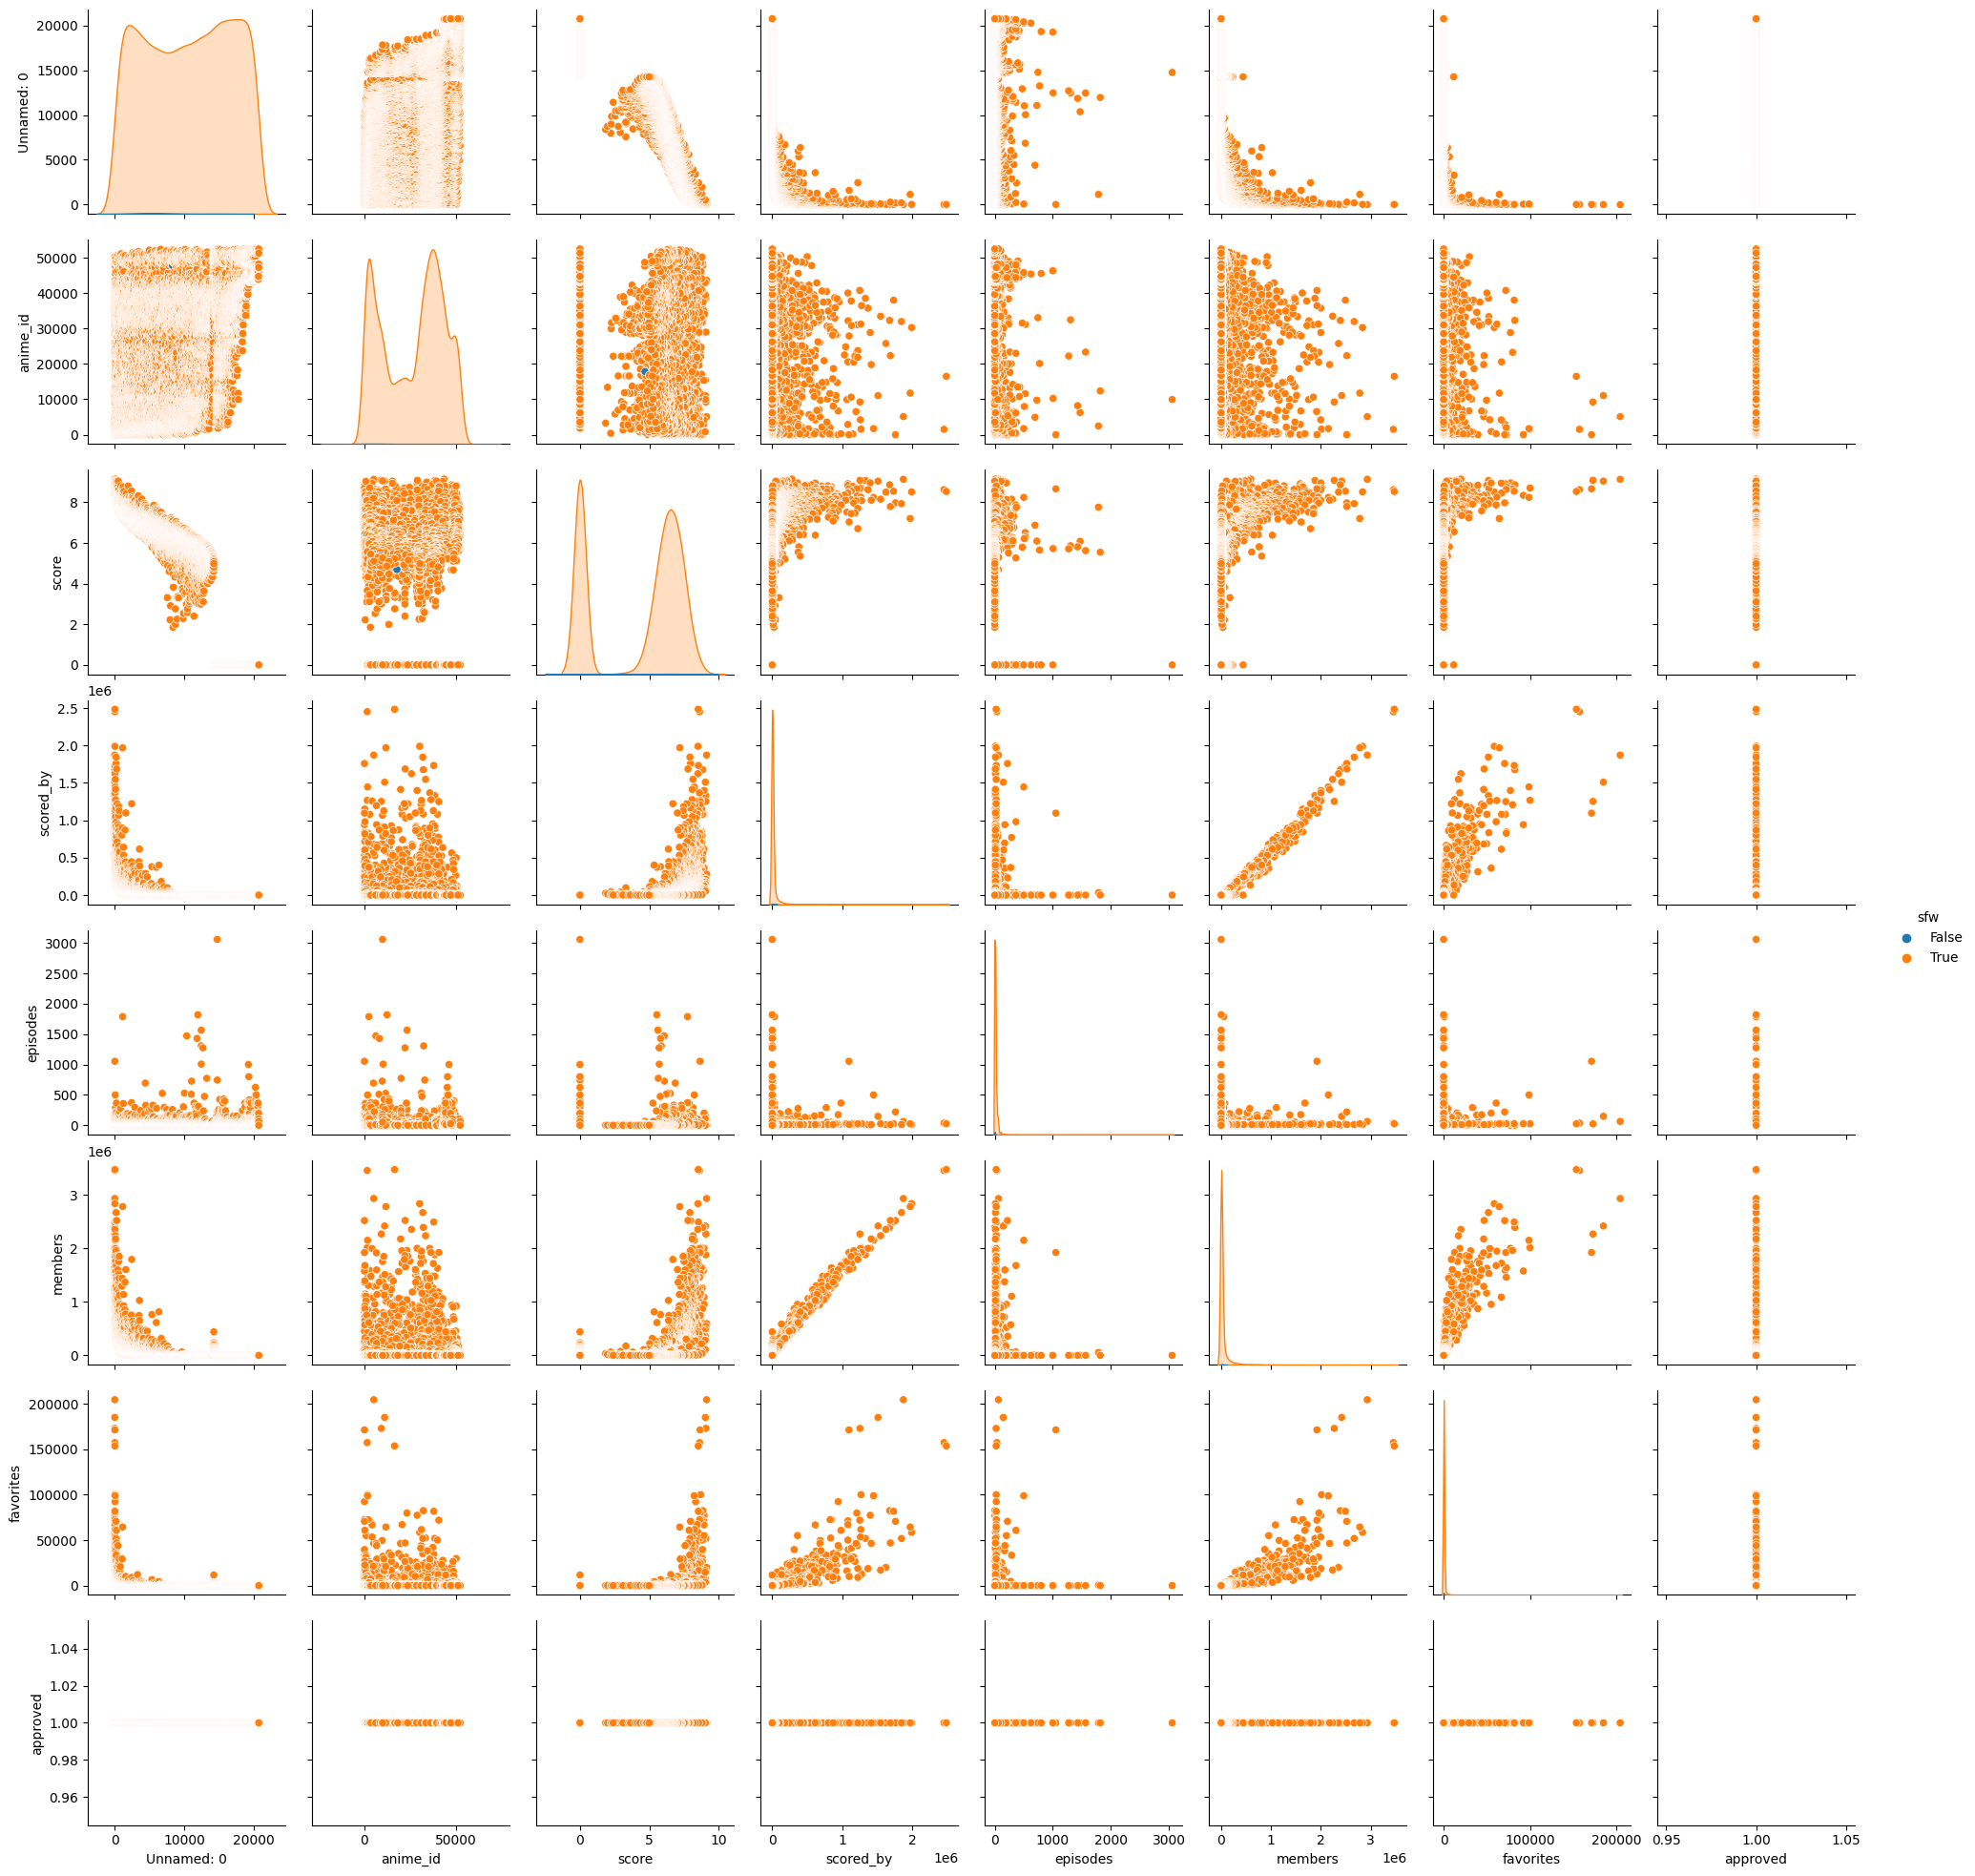

In [24]:
sb.pairplot(anime_df, hue='sfw')

C:\Users\kalaj\AppData\Local\Temp\ipykernel_2464\2486932593.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sb.heatmap(anime_df.corr(), annot = True)


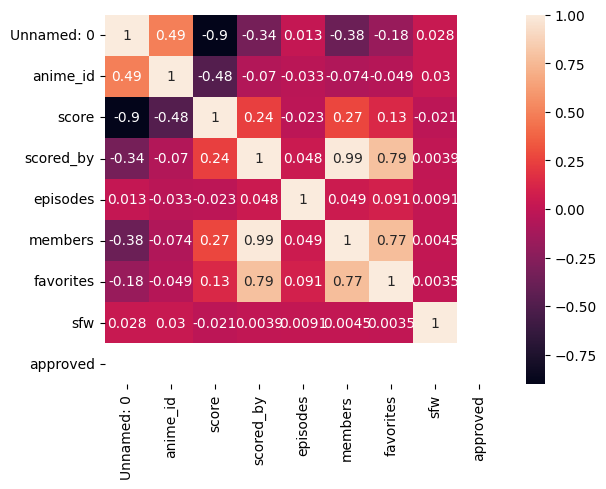

In [12]:
sb.heatmap(anime_df.corr(), annot = True)
plt.show()

## Create Your Model

Use the two columns with the strongest correlation to create and train your model. Make sure to print out the summary and plot the column values and the line produced by the model.

In [13]:
x = anime_df['scored_by']
y = anime_df['favorites']

In [14]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7,
                                                   test_size = 0.3, random_state = 100)

x_train

8958        405
1691      42701
18057        31
16972        59
15183        52
          ...  
16304        72
79       350851
12119       122
14147        48
5640     371551
Name: scored_by, Length: 13517, dtype: int64

In [15]:
y_train

8958        8
1691      279
18057       0
16972       0
15183       0
         ... 
16304       0
79       6871
12119       0
14147       0
5640     2998
Name: favorites, Length: 13517, dtype: int64

In [16]:
import statsmodels.api as sm

x_train_sm = sm.add_constant(x_train)


lr = sm.OLS(y_train, x_train_sm).fit()

lr.params

const       -312.484662
scored_by      0.037830
dtype: float64

In [17]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              favorites   R-squared:                       0.656
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                 2.581e+04
Date:                Mon, 06 Mar 2023   Prob (F-statistic):               0.00
Time:                        19:45:42   Log-Likelihood:            -1.2593e+05
No. Observations:               13517   AIC:                         2.519e+05
Df Residuals:                   13515   BIC:                         2.519e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -312.4847     23.682    -13.195      0.000    -358.905    -266.065
scored_by      0.0378      0.000    160.653      0.000       0.037       0.038
==============================================================================
Omnibus:                    30338.808   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        529507011.310
Skew:                          20.647   Prob(JB):                         0.00
Kurtosis:                     971.740   Cond. No.                     1.03e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.03e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

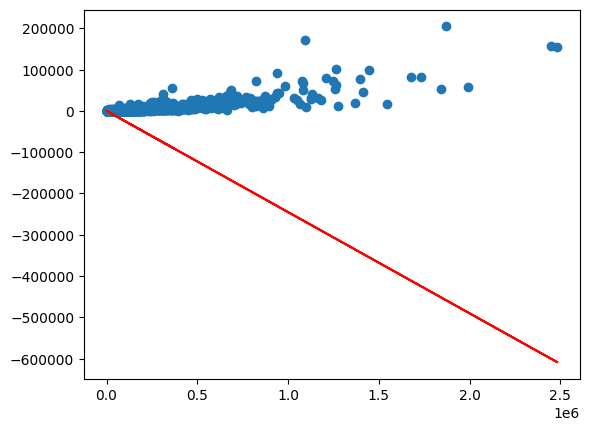

In [21]:
plt.scatter(x_train, y_train)

plt.plot(x_train, 26.439 + -0.245*x_train, 'r')

plt.show()

## Error Terms

Finally, plot your error terms!

In [20]:
r_sqr=r**2
print(r_sqr)

NameError: name 'r' is not defined

In [ ]:
y_train_pred = lr.predict(x_train_sm)

res = (y_train - y_train_pred)

In [ ]:
fig = plt.figure()

sb.distplot(res, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize=15)
plt.show()

<h1 style="background-color:Purple; color:White; text-align:center">Manga Unnecessary Data Evaluation</h1>

## Find Correlations

Use either pairplot or a heatmap or both to find the two variables with the strongest correlation in your dataset.

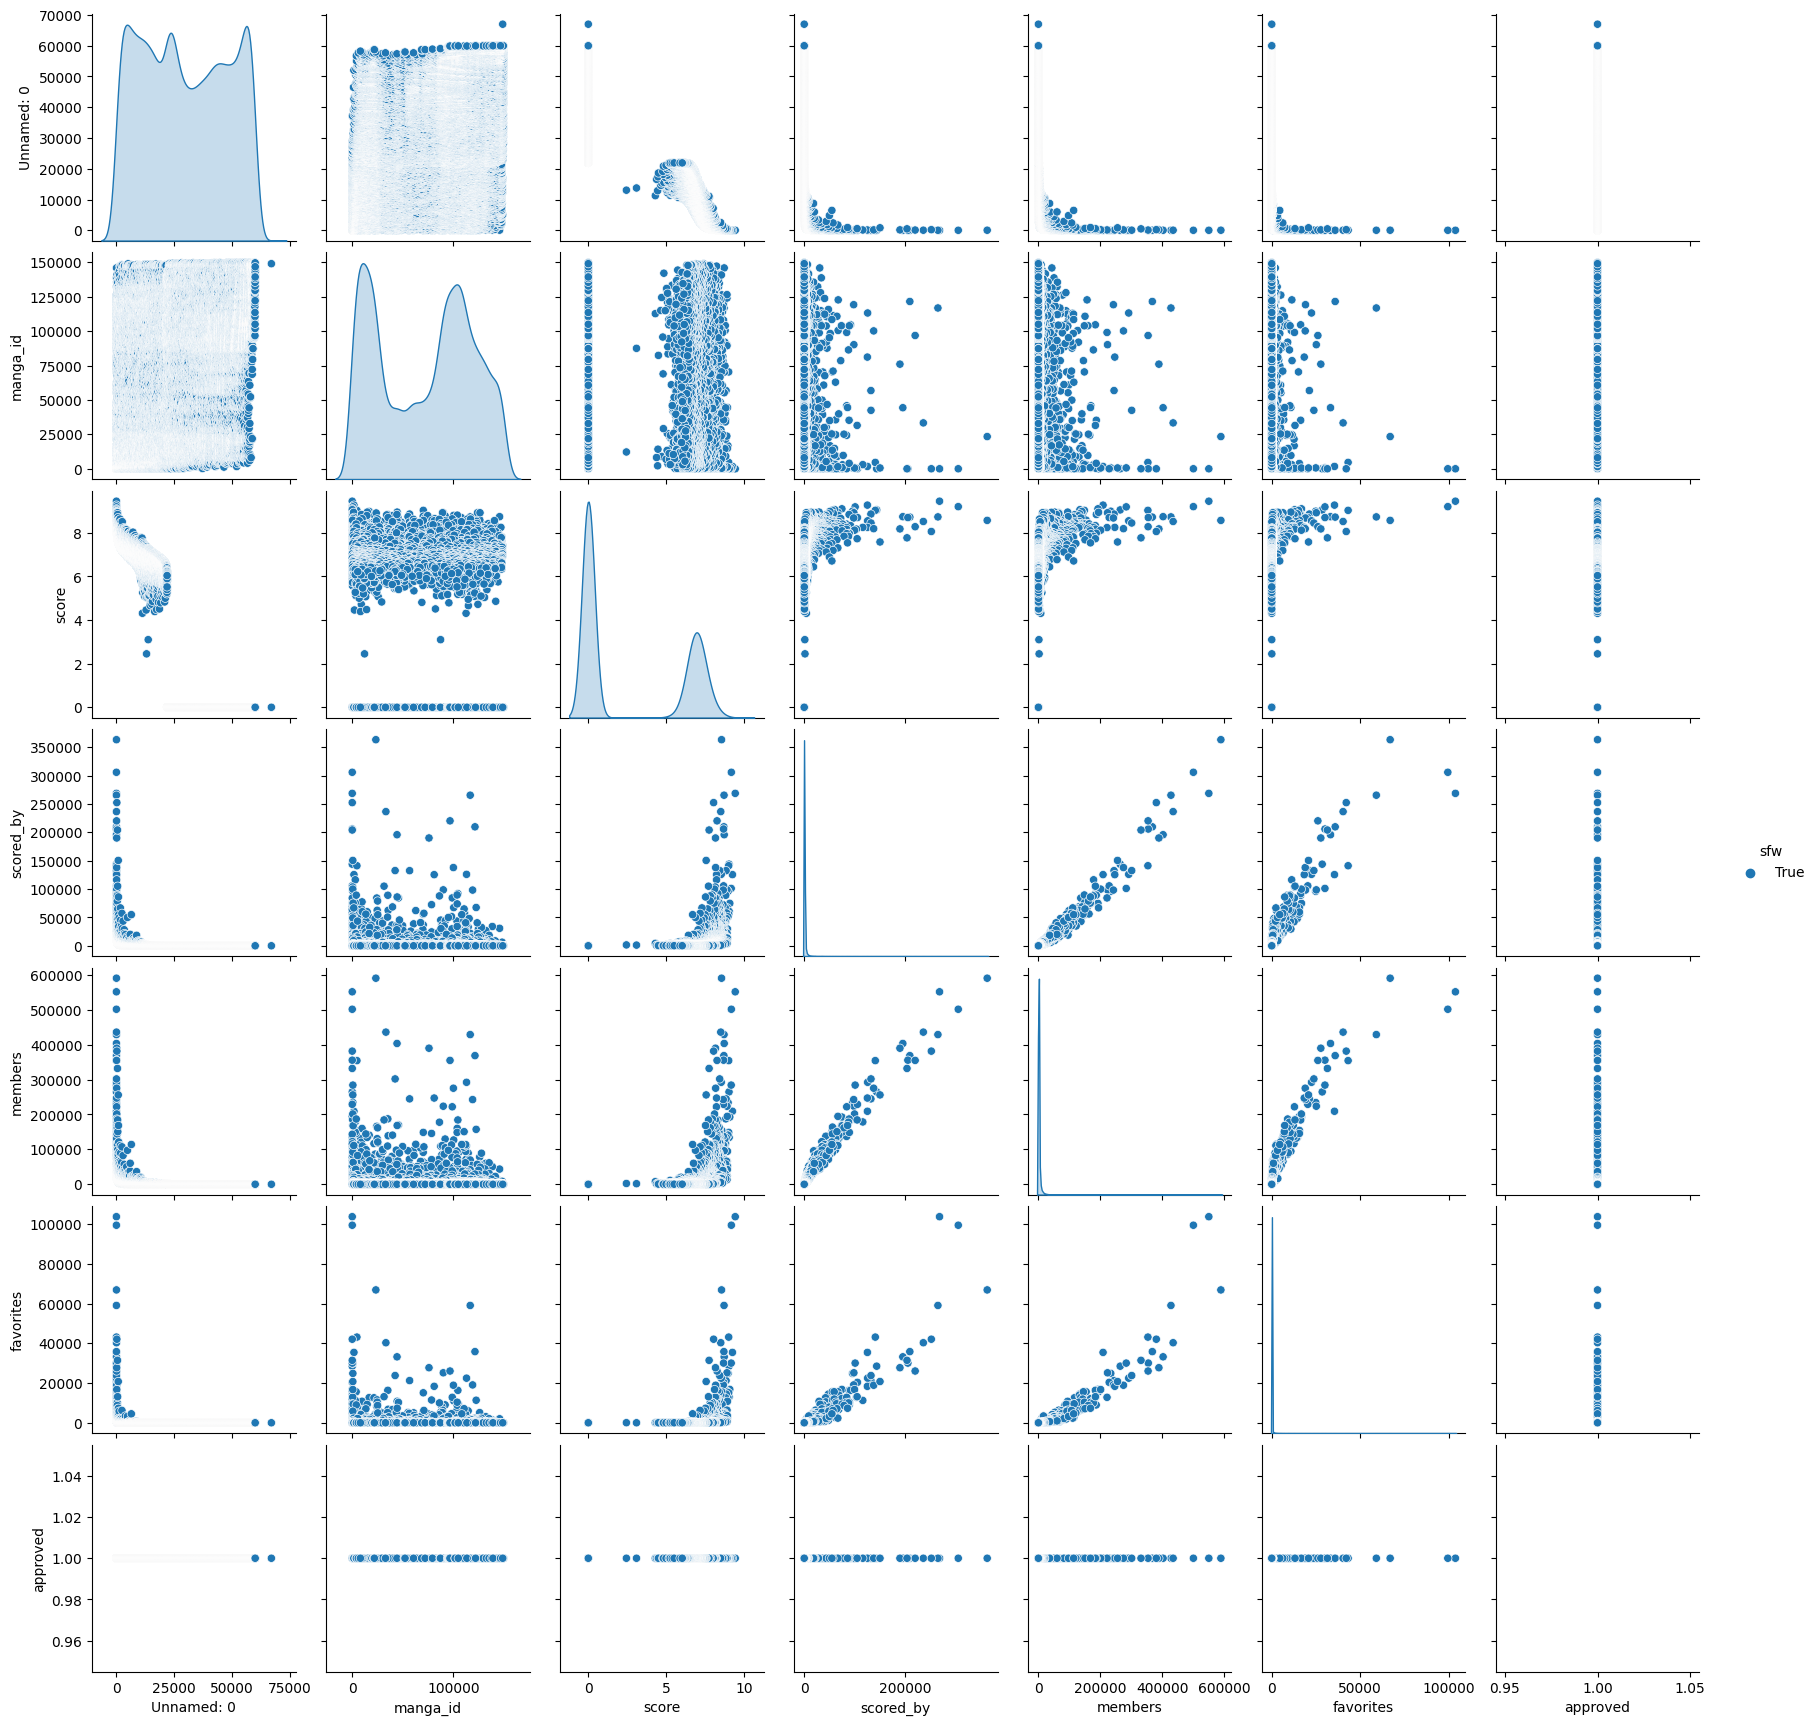

In [32]:
sb.pairplot(manga_df, hue='sfw')

C:\Users\kalaj\AppData\Local\Temp\ipykernel_2464\115490698.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sb.heatmap(manga_df.corr(), annot = True)


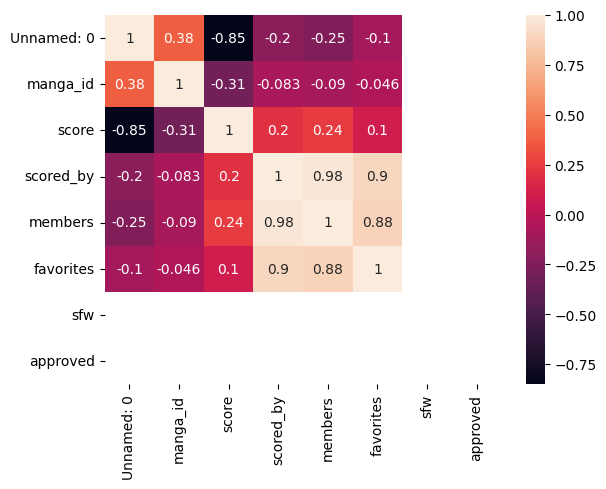

In [33]:
sb.heatmap(manga_df.corr(), annot = True)
plt.show()

## Create Your Model

Use the two columns with the strongest correlation to create and train your model. Make sure to print out the summary and plot the column values and the line produced by the model.

In [34]:
x = manga_df['members']
y = manga_df['favorites']

In [35]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7,
                                                   test_size = 0.3, random_state = 100)

x_train

8340      1165
19643      221
1612      6404
21969      154
22141      150
         ...  
16304      507
79       89344
12119      776
14147      641
38408       22
Name: members, Length: 28589, dtype: int64

In [36]:
y_train

8340       13
19643       3
1612       33
21969       0
22141       0
         ... 
16304       9
79       6015
12119       1
14147       0
38408       0
Name: favorites, Length: 28589, dtype: int64

In [37]:
import statsmodels.api as sm

x_train_sm = sm.add_constant(x_train)


lr = sm.OLS(y_train, x_train_sm).fit()

lr.params

const     -116.732729
members      0.089186
dtype: float64

In [38]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              favorites   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                 9.507e+04
Date:                Tue, 07 Mar 2023   Prob (F-statistic):               0.00
Time:                        11:33:38   Log-Likelihood:            -2.2509e+05
No. Observations:               28589   AIC:                         4.502e+05
Df Residuals:                   28587   BIC:                         4.502e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -116.7327      3.814    -30.610      0.000    -124.208    -109.258
members        0.0892      0.000    308.335      0.000       0.089       0.090
==============================================================================
Omnibus:                    87336.831   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      18747147949.911
Skew:                          45.698   Prob(JB):                         0.00
Kurtosis:                    3969.052   Cond. No.                     1.34e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.34e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

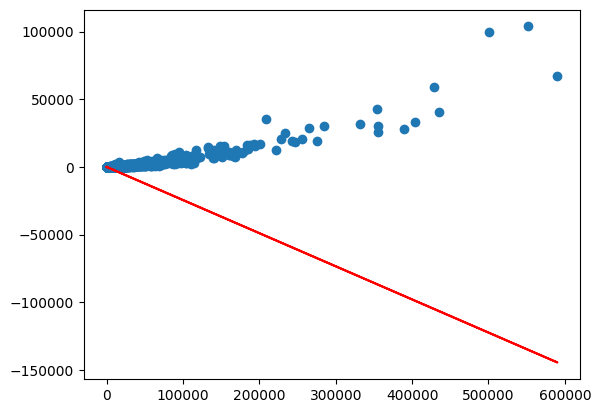

In [39]:
plt.scatter(x_train, y_train)

plt.plot(x_train, 26.439 + -0.245*x_train, 'r')

plt.show()

## Error Terms

Finally, plot your error terms!

In [40]:
r_sqr=r**2
print(r_sqr)

NameError: name 'r' is not defined

In [ ]:
y_train_pred = lr.predict(x_train_sm)

res = (y_train - y_train_pred)

In [ ]:
fig = plt.figure()

sb.distplot(res, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize=15)
plt.show()

<h1 style="background-color:Red; color:White; text-align:center">Final Summary</h1>

## Summarize Your Work

Make notes of your answers to the questions below.

1. What was your R-squared value?
2. Based on your results, do you think a linear regression model was the best type of predictive analysis for your dataset? 
3. Was your plot of the error terms a bell curve?